In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [4]:
df_pl=pd.read_csv(r"C:\Users\adeln\Documents\archive\final_data.csv")

In [5]:
correlation = df_pl.corr(numeric_only=True)
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
assists                0.137415
games_injured          0.135654
goals                  0.121574
days_injured           0.107686
position_encoded       0.085154
height                 0.040535
winger                 0.005034
red cards             -0.010171
clean sheets          -0.011684
yellow cards          -0.011766
second yellow cards   -0.013889
age                   -0.050156
goals conceded        -0.063529
Name: current_value, dtype: float64


In [6]:
df_pl

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [7]:
correlation = df_pl.corr(numeric_only=True)
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
assists                0.137415
games_injured          0.135654
goals                  0.121574
days_injured           0.107686
position_encoded       0.085154
height                 0.040535
winger                 0.005034
red cards             -0.010171
clean sheets          -0.011684
yellow cards          -0.011766
second yellow cards   -0.013889
age                   -0.050156
goals conceded        -0.063529
Name: current_value, dtype: float64


In [8]:
df_pl.duplicated().sum()

np.int64(0)

In [9]:
df_pl.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [10]:
df_pl.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [11]:
df_pl=df_pl.drop(['player'], axis=1)

In [12]:
df_pl.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [13]:
df_pl.sort_values(by='highest_value' , ascending=False).head() 

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2644,Paris Saint-Germain,Kylian Mbappé,Attack Centre-Forward,178.0,24.0,89,0.963082,0.433387,0.204655,0.00000,...,0.0,0.0,7476,139,23,37,180000000,200000000,4,0
2643,Paris Saint-Germain,Lionel Messi,Attack-RightWinger,170.0,35.0,75,0.442464,0.483945,0.013827,0.00000,...,0.0,0.0,6509,167,30,92,45000000,180000000,4,1
2642,Paris Saint-Germain,Neymar,Attack-LeftWinger,175.0,31.0,57,0.594883,0.479744,0.383795,0.01919,...,0.0,0.0,4690,419,67,35,70000000,180000000,4,1
453,Manchester City,Erling Haaland,Attack Centre-Forward,195.0,22.0,83,1.118270,0.234699,0.124252,0.00000,...,0.0,0.0,6519,204,36,17,170000000,170000000,4,0
527,Chelsea FC,Raheem Sterling,Attack-LeftWinger,170.0,28.0,85,0.414233,0.207116,0.111524,0.00000,...,0.0,0.0,5649,284,34,13,60000000,160000000,4,1


In [14]:
df_pl.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [15]:
categorical_features=['team','name','position']
numeric_features=['position',  'height',  'age' , 'appearance' ,'goals',  'assists',  'yellow', 'cards', 'second', 'yellow cards',
 'red cards',  'goals conceded' ,'clean sheet', 'minutes played' ,'days_injured',  'games_injured'  , 'award' ,'current_value',
 'highest_value' , 'position_encoded' ,'winger' ]

In [16]:
Q1 = df_pl['highest_value'].quantile(0.25)
Q3 = df_pl['highest_value'].quantile(0.75)
IQR = Q3 - Q1
df_pl2 = df_pl[(df_pl['highest_value'] >= Q1 - 1.5 * IQR) & (df_pl['highest_value'] <= Q3 + 1.5 * IQR)]

df_pl2


,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


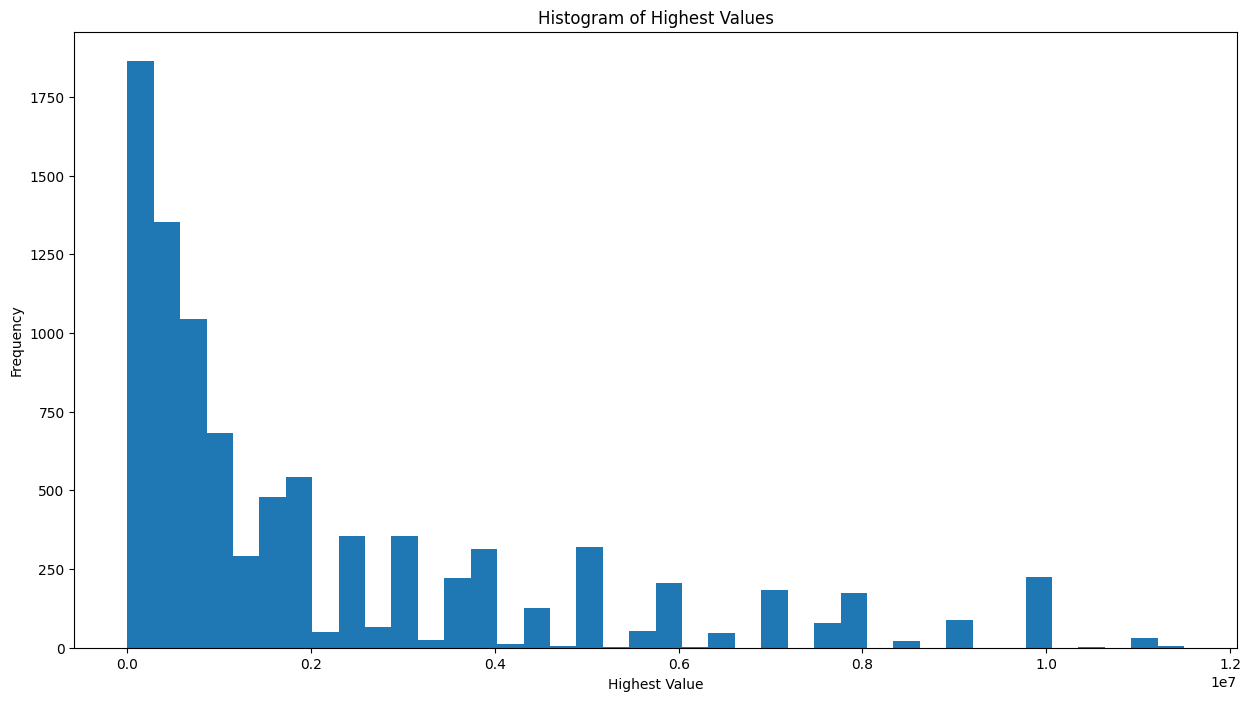

In [17]:
plt.figure(figsize=(15,8))

plt.hist(df_pl2['highest_value'], bins=40)                         
plt.xlabel('Highest Value')
plt.ylabel('Frequency')
plt.title('Histogram of Highest Values')
plt.show()

In [18]:
Q1 = df_pl['highest_value'].quantile(0.25)
Q3 = df_pl['highest_value'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['highest_value'] >= Q1 - 1.5 * IQR) & (df_pl['highest_value'] <= Q3 + 1.5 * IQR)]

In [19]:
df_pl.sort_values(by='highest_value' , ascending=False).head() 

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1373,Real Valladolid CF,Cyle Larin,Attack Centre-Forward,188.0,28.0,70,0.366292,0.086186,0.237012,0.00000,...,0.0,0.0,4177,85,10,5,8000000,11500000,4,0
1878,Hellas Verona,Miguel Veloso,midfield-DefensiveMidfield,181.0,37.0,46,0.000000,0.134882,0.370925,0.03372,...,0.0,0.0,2669,444,68,9,700000,11500000,3,0
6294,Fenerbahce,Irfan Can Kahveci,Attack-RightWinger,176.0,27.0,71,0.230340,0.272220,0.314100,0.00000,...,0.0,0.0,4298,212,44,2,6500000,11500000,4,1
2654,AZ Alkmaar,Bruno Martins Indi,Defender Centre-Back,185.0,31.0,59,0.034377,0.017189,0.137510,0.00000,...,0.0,0.0,5236,425,67,1,2200000,11500000,2,0
3663,São Paulo Futebol Clube,Marcos Paulo,Attack-LeftWinger,186.0,22.0,47,0.206897,0.124138,0.041379,0.00000,...,0.0,0.0,2175,15,0,0,4000000,11000000,4,1


In [20]:
Q1 = df_pl['goals'].quantile(0.25)
Q3 = df_pl['goals'].quantile(0.75)
IQR = Q3 - Q1
df_pl2 = df_pl[(df_pl['goals'] >= Q1 - 1.5 * IQR) & (df_pl['goals'] <= Q3 + 1.5 * IQR)]

df_pl2

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [21]:
Q1 = df_pl['goals'].quantile(0.25)
Q3 = df_pl['goals'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['goals'] >= Q1 - 1.5 * IQR) & (df_pl['goals'] <= Q3 + 1.5 * IQR)]

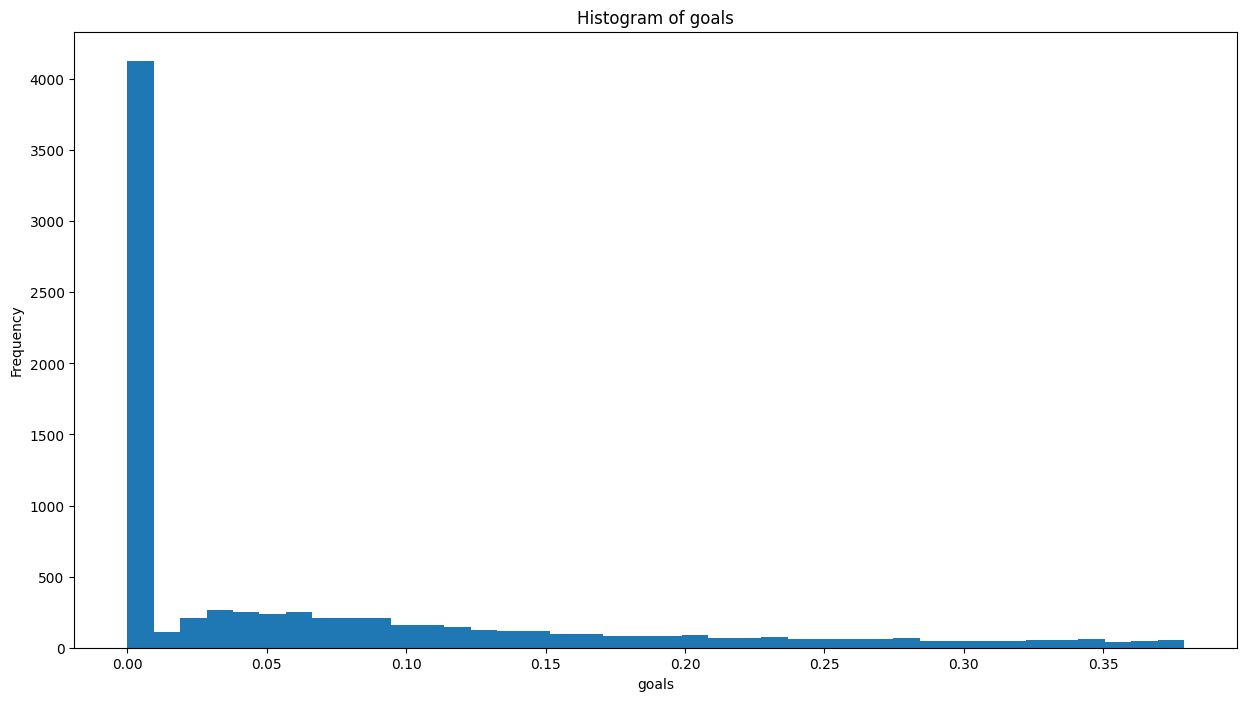

In [22]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['goals'], bins=40)                         
plt.xlabel('goals')
plt.ylabel('Frequency')
plt.title('Histogram of goals')
plt.show()

In [23]:
df_pl['current_value'].value_counts

<bound method IndexOpsMixin.value_counts of 2         600000
8        2000000
20        800000
21        800000
28       3000000
          ...   
10749      75000
10750     300000
10751      50000
10752      50000
10753      25000
Name: current_value, Length: 8468, dtype: int64>

In [24]:
Q1 = df_pl['current_value'].quantile(0.25)
Q3 = df_pl['current_value'].quantile(0.75)
IQR = Q3 - Q1
df_pl3=df_pl[(df_pl['current_value'] >= Q1 - 1.5 * IQR) & (df_pl['current_value'] <= Q3 + 1.5 * IQR)]
df_pl3

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


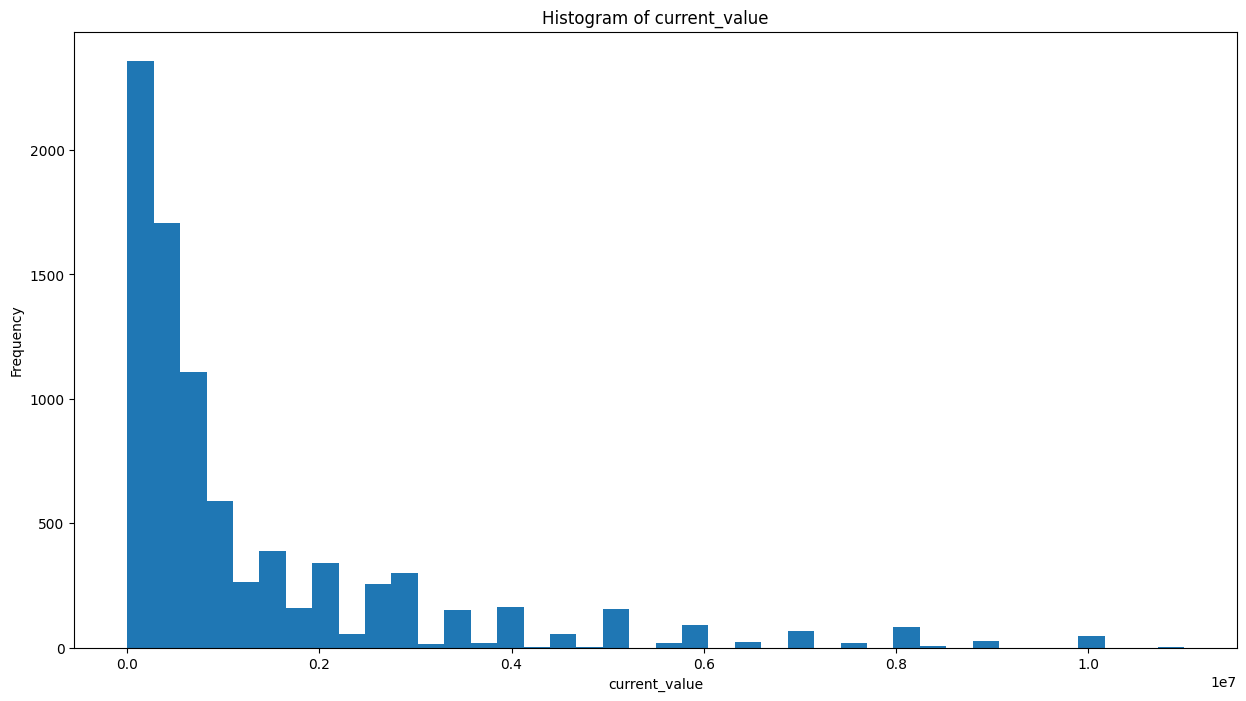

In [25]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['current_value'], bins=40)                         
plt.xlabel('current_value')
plt.ylabel('Frequency')
plt.title('Histogram of current_value')
plt.show()

In [26]:
Q1 = df_pl['current_value'].quantile(0.25)
Q3 = df_pl['current_value'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['current_value'] >= Q1 - 1.5 * IQR) & (df_pl['current_value'] <= Q3 + 1.5 * IQR)]

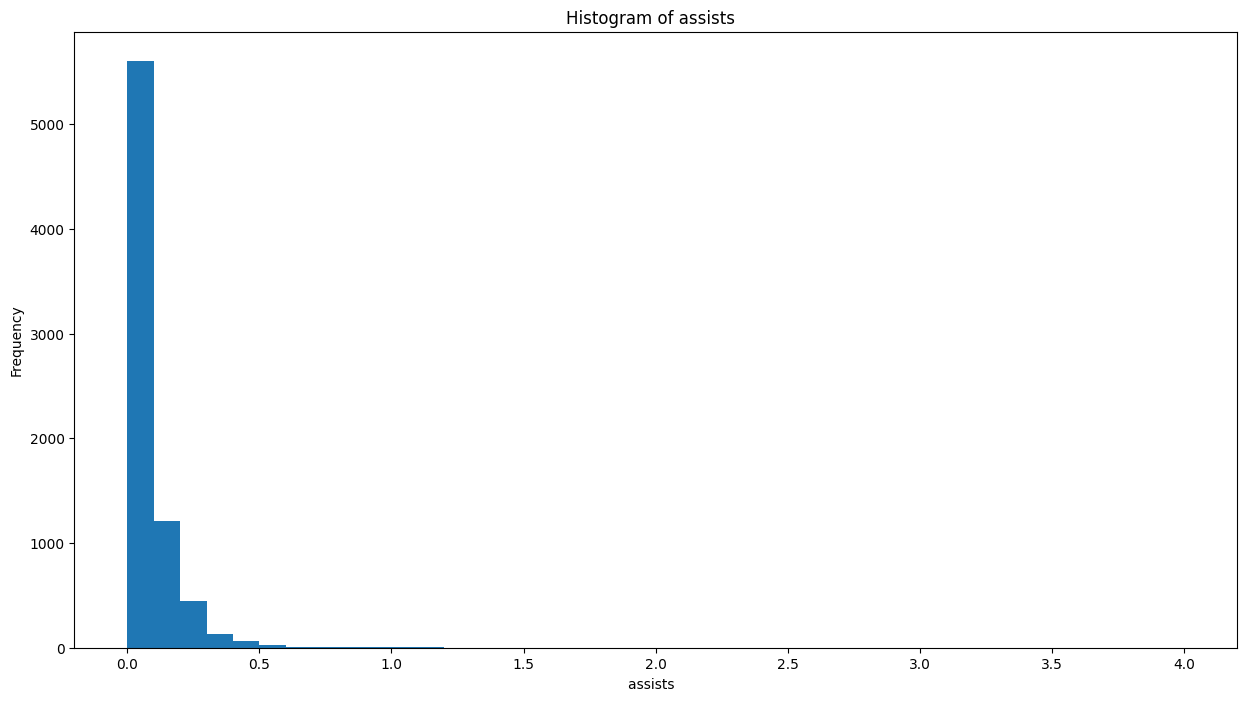

In [27]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['assists'], bins=40)                         
plt.xlabel('assists  ')
plt.ylabel('Frequency')
plt.title('Histogram of assists  ')
plt.show()

In [28]:
Q1 = df_pl['assists'].quantile(0.25)
Q3 = df_pl['assists'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['assists'] >= Q1 - 1.5 * IQR) & (df_pl['assists'] <= Q3 + 1.5 * IQR)]

In [29]:
df_pl

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


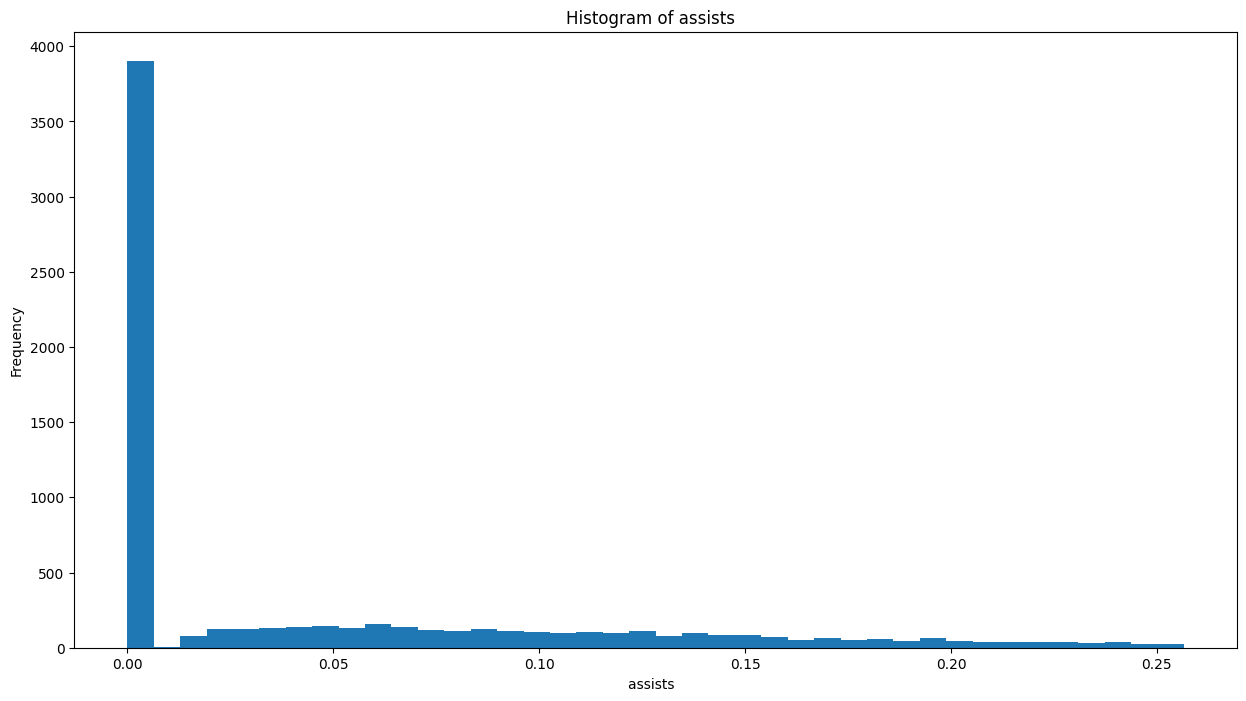

In [30]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['assists'], bins=40)                         
plt.xlabel('assists  ')
plt.ylabel('Frequency')
plt.title('Histogram of assists  ')
plt.show()

In [31]:
Q1 = df_pl['height'].quantile(0.25)
Q3 = df_pl['height'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['height'] >= Q1 - 1.5 * IQR) & (df_pl['height'] <= Q3 + 1.5 * IQR)]

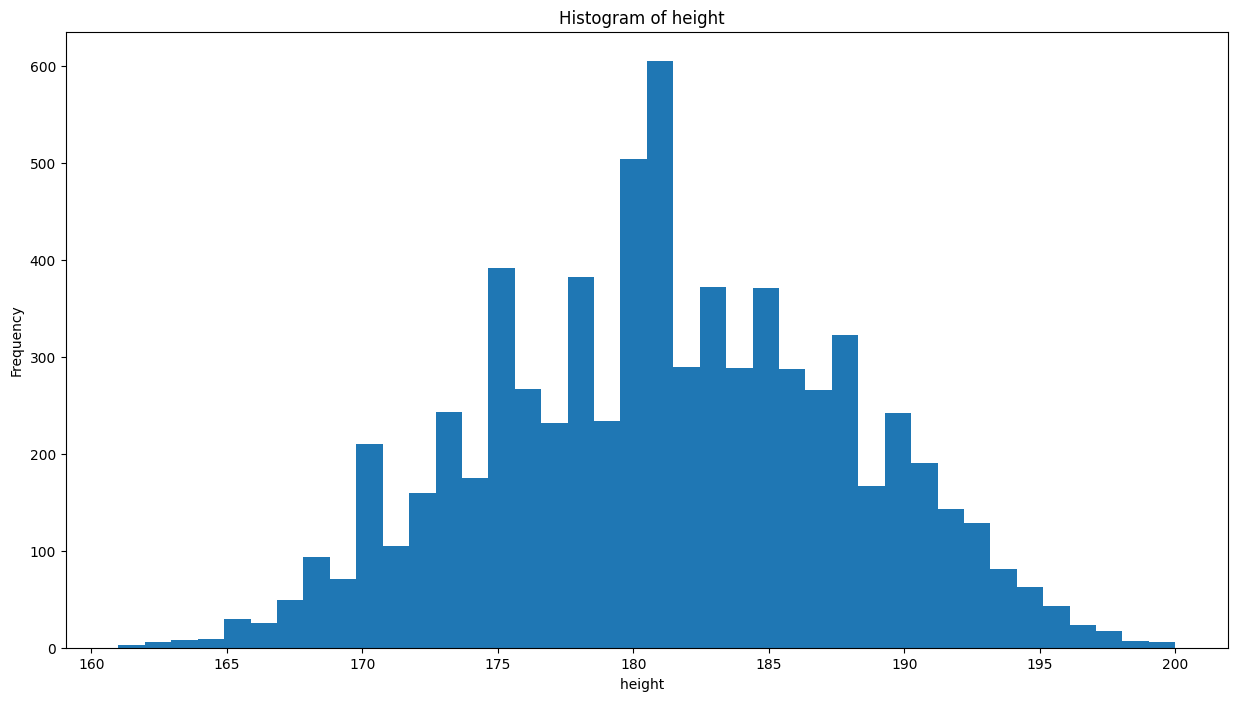

In [32]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['height'], bins=40)                         
plt.xlabel('height  ')
plt.ylabel('Frequency')
plt.title('Histogram of height  ')
plt.show()

In [33]:
Q1 = df_pl['appearance'].quantile(0.25)
Q3 = df_pl['appearance'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['appearance'] >= Q1 - 1.5 * IQR) & (df_pl['appearance'] <= Q3 + 1.5 * IQR)]

In [34]:
df_pl

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


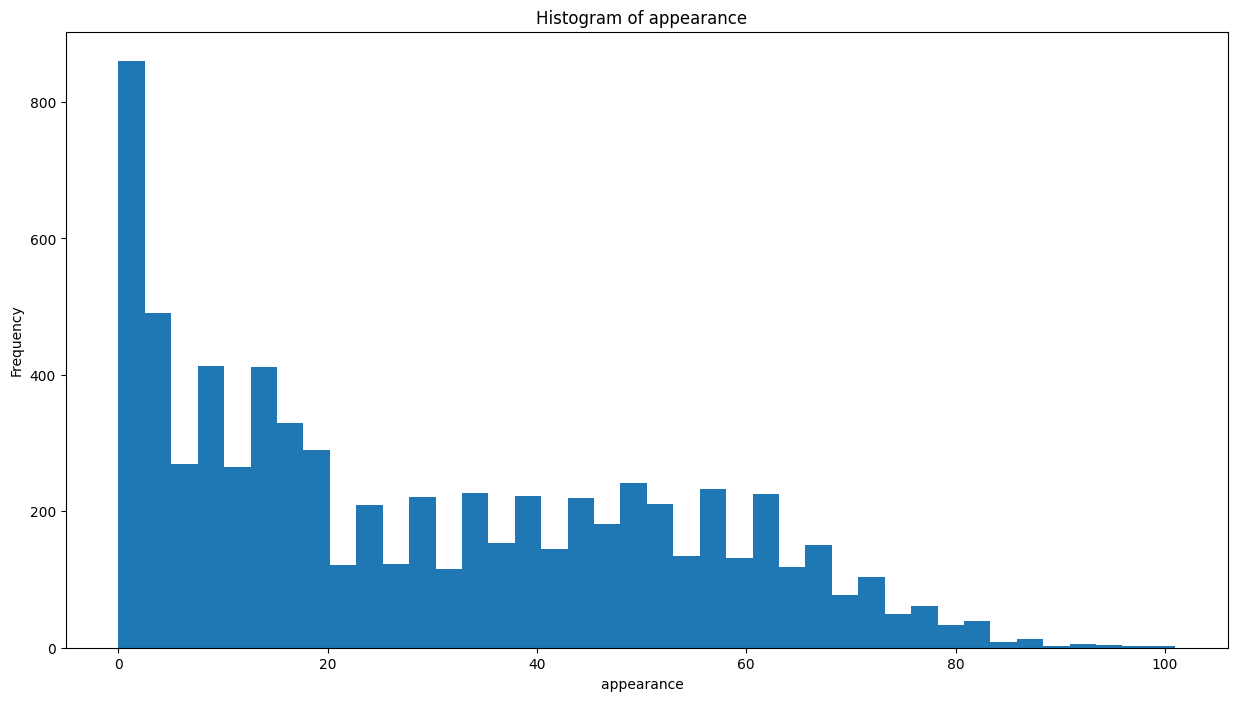

In [35]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['appearance'], bins=40)                         
plt.xlabel('appearance  ')
plt.ylabel('Frequency')
plt.title('Histogram of appearance  ')
plt.show()

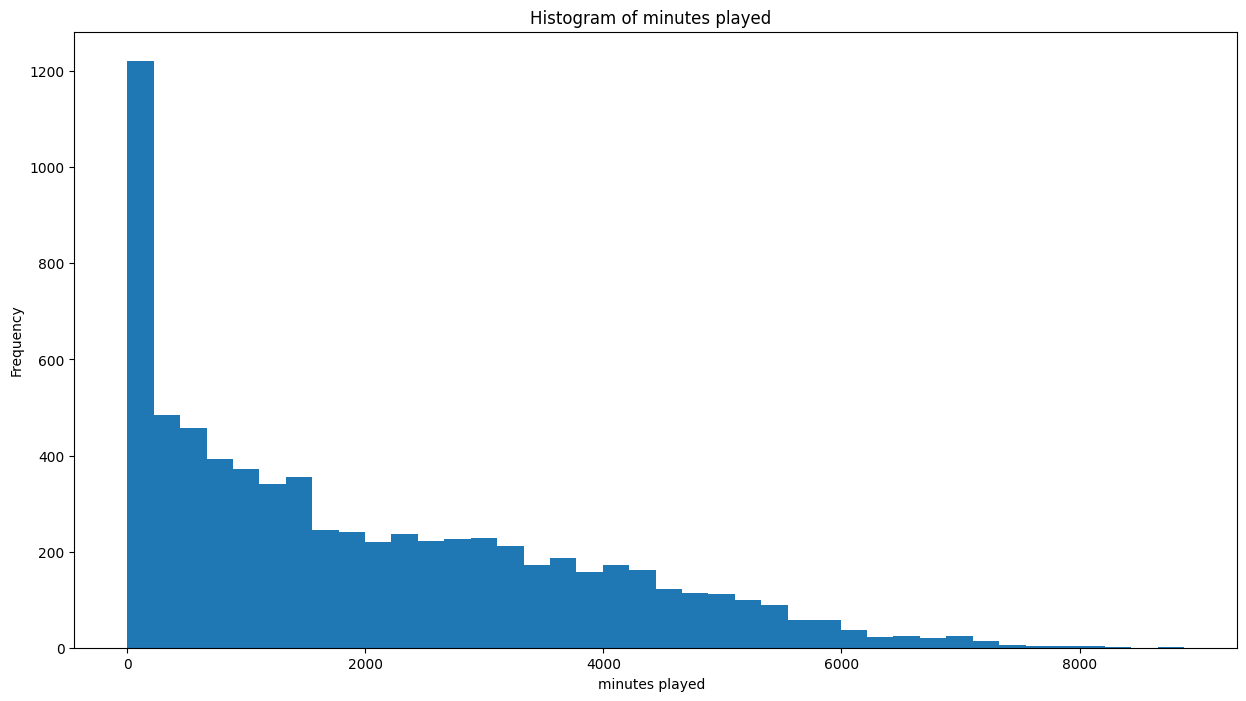

In [36]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['minutes played'], bins=40)                         
plt.xlabel('minutes played  ')
plt.ylabel('Frequency')
plt.title('Histogram of minutes played  ')
plt.show()

In [37]:
Q1 = df_pl['days_injured'].quantile(0.25)
Q3 = df_pl['days_injured'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['days_injured'] >= Q1 - 1.5 * IQR) & (df_pl['days_injured'] <= Q3 + 1.5 * IQR)]

In [38]:
Q1 = df_pl['games_injured'].quantile(0.25)
Q3 = df_pl['games_injured'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['games_injured'] >= Q1 - 1.5 * IQR) & (df_pl['games_injured'] <= Q3 + 1.5 * IQR)]

In [39]:
Q1 = df_pl['award'].quantile(0.25)
Q3 = df_pl['award'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['award'] >= Q1 - 1.5 * IQR) & (df_pl['award'] <= Q3 + 1.5 * IQR)]

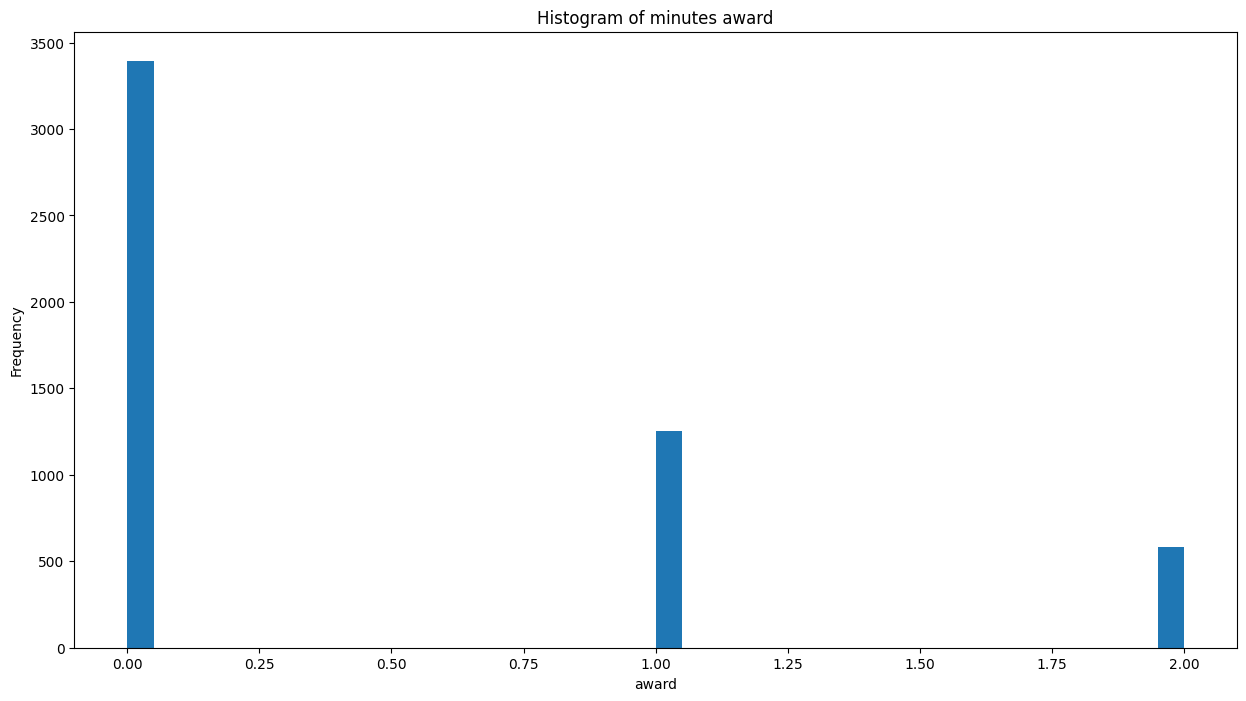

In [40]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['award'], bins=40)                         
plt.xlabel('award')
plt.ylabel('Frequency')
plt.title('Histogram of minutes award')
plt.show()

In [41]:
Q1 = df_pl['position_encoded'].quantile(0.25)
Q3 = df_pl['position_encoded'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['position_encoded'] >= Q1 - 1.5 * IQR) & (df_pl['position_encoded'] <= Q3 + 1.5 * IQR)]

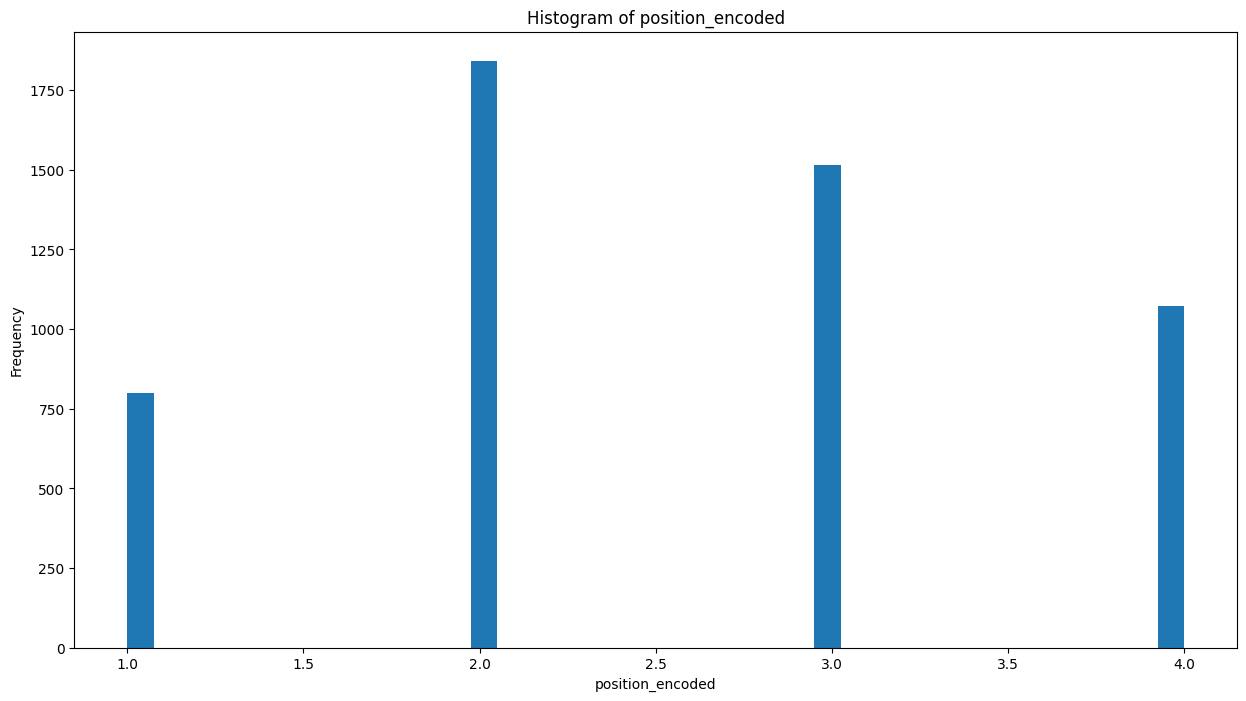

In [42]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['position_encoded'], bins=40)                         
plt.xlabel('position_encoded')
plt.ylabel('Frequency')
plt.title('Histogram of position_encoded')
plt.show()

In [43]:
df_pl

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
55,Leicester City,Daniel Iversen,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,...,1.257883,0.291461,5867,0,0,0,2000000,2000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [44]:
categorical_features

['team', 'name', 'position']

In [45]:
correlation = df_pl.corr(numeric_only=True)
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.706182
appearance             0.404469
minutes played         0.385717
assists                0.230826
games_injured          0.201376
days_injured           0.175210
goals                  0.164277
award                  0.138309
position_encoded       0.093798
winger                 0.066425
age                    0.057219
yellow cards           0.026012
second yellow cards    0.017716
red cards              0.003535
height                -0.018699
clean sheets          -0.044552
goals conceded        -0.102148
Name: current_value, dtype: float64


In [46]:

threshold = 0.1

selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value'],
      dtype='object')

In [47]:
selected_features=['appearance', 'minutes played', 'highest_value', 'current_value']

In [48]:
df_pl = df_pl[selected_features]
df_pl.head()

,appearance,minutes played,highest_value,current_value
8,34,2758,2000000,2000000
20,39,2788,800000,800000
21,51,3512,800000,800000
28,34,1030,7000000,3000000
55,65,5867,2000000,2000000


In [49]:
X = df_pl


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
X.shape

(5228, 4)

In [51]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

  File "c:\Users\adeln\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\adeln\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\adeln\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\adeln\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


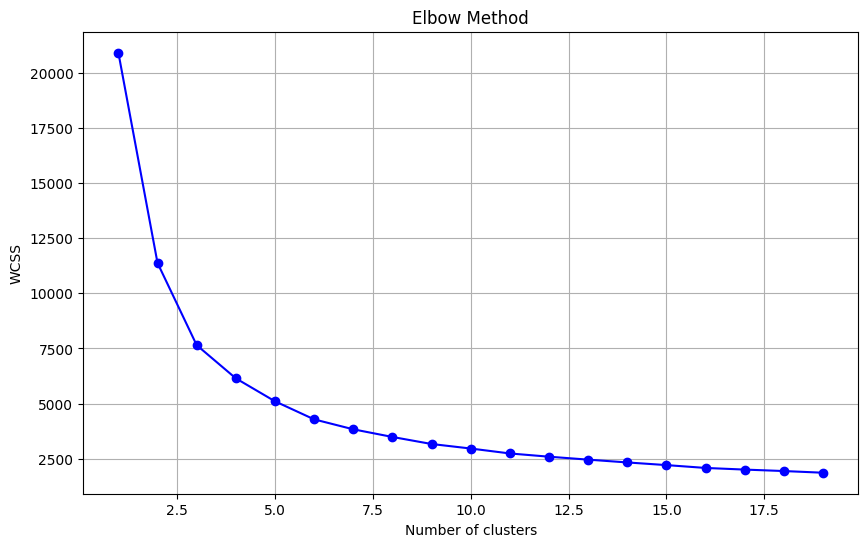

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [53]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 5 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [54]:
y_pred = model.fit_predict(X_scaled)

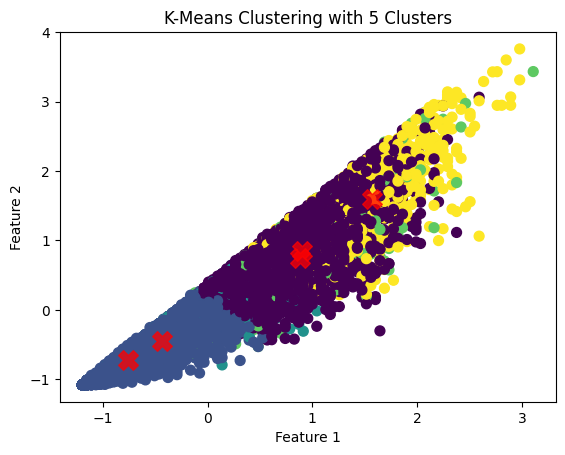

In [55]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [56]:
X['kmeans'] = y_pred


In [57]:
X['kmeans'].value_counts()


kmeans
1    2645
0    1431
4     510
2     495
3     147
Name: count, dtype: int64

In [58]:
X[X['kmeans']==0]


,appearance,minutes played,highest_value,current_value,kmeans
20,39,2788,800000,800000,0
21,51,3512,800000,800000,0
106,60,5490,200000,200000,0
118,38,2424,500000,500000,0
163,25,2250,1500000,1000000,0
...,...,...,...,...,...
10734,42,3315,400000,400000,0
10737,29,2432,400000,400000,0
10740,44,3585,2000000,500000,0
10741,33,2375,750000,350000,0


<Axes: xlabel='current_value', ylabel='minutes played'>

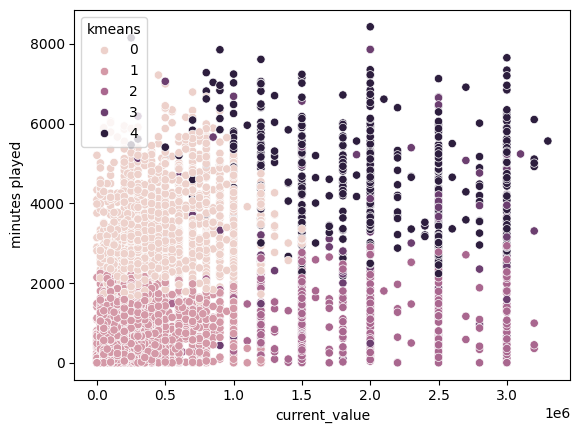

In [59]:
sns.scatterplot(data = X , x = 'current_value', y = 'minutes played', hue = 'kmeans')


In [61]:
import joblib
joblib.dump(model, 'knn_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']